### Julia Perceptron 

Frank Rosenblatt published the first concept of the Perceptron learning rule [1]. The algorithm modeled the Schedmatic of a biological neuron. The main idea was to define an algorithm in order to learn the values of the weights w that are then multiplied with the input features in order to make a decision whether a neuron fires or not. Thus, we can demonstrate this as follows.

<img src="Images/perceptron-learning-rule.jpg" width="400" />

In [1]:
using CSV, Plots
theme(:dark)
iris = CSV.read("iris_data.csv");

#### Iris Data

<img src="Images/iris-machinelearning.png" width="400" />

In [2]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [3]:
data = [x for x in zip(iris[1:100, 1], iris[1:100, 3], iris[1:100, 5])];


In [4]:
data

100-element Array{Tuple{Float64,Float64,String},1}:
 (5.1, 1.4, "setosa")    
 (4.9, 1.4, "setosa")    
 (4.7, 1.3, "setosa")    
 (4.6, 1.5, "setosa")    
 (5.0, 1.4, "setosa")    
 (5.4, 1.7, "setosa")    
 (4.6, 1.4, "setosa")    
 (5.0, 1.5, "setosa")    
 (4.4, 1.4, "setosa")    
 (4.9, 1.5, "setosa")    
 (5.4, 1.5, "setosa")    
 (4.8, 1.6, "setosa")    
 (4.8, 1.4, "setosa")    
 ⋮                       
 (5.6, 4.1, "versicolor")
 (5.5, 4.0, "versicolor")
 (5.5, 4.4, "versicolor")
 (6.1, 4.6, "versicolor")
 (5.8, 4.0, "versicolor")
 (5.0, 3.3, "versicolor")
 (5.6, 4.2, "versicolor")
 (5.7, 4.2, "versicolor")
 (5.7, 4.2, "versicolor")
 (6.2, 4.3, "versicolor")
 (5.1, 3.0, "versicolor")
 (5.7, 4.1, "versicolor")

#### Plotting and Checking for Linearly Seperable Data

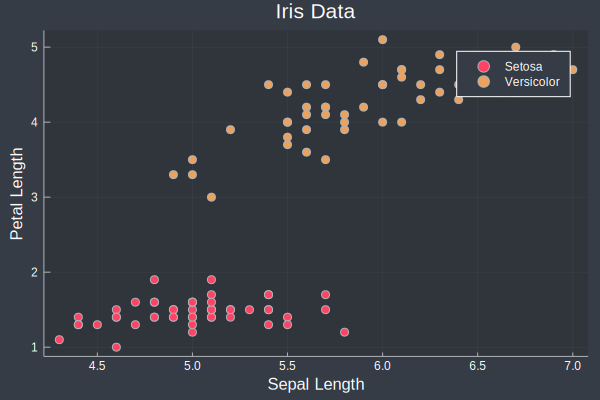

In [5]:
scatter([x[1:2] for x in data if x[3] == "setosa"], label = "Setosa")
scatter!([x[1:2] for x in data if x[3] == "versicolor"], label = "Versicolor")
plot!(title = "Iris Data", xlabel = "Sepal Length", ylabel = "Petal Length")

In [6]:
X, Y = [[x[1], x[2]] for x in data], [x[3] == "setosa" ? 1 : -1 for x in data]


(Array{Float64,1}[[5.1, 1.4], [4.9, 1.4], [4.7, 1.3], [4.6, 1.5], [5.0, 1.4], [5.4, 1.7], [4.6, 1.4], [5.0, 1.5], [4.4, 1.4], [4.9, 1.5]  …  [5.5, 4.4], [6.1, 4.6], [5.8, 4.0], [5.0, 3.3], [5.6, 4.2], [5.7, 4.2], [5.7, 4.2], [6.2, 4.3], [5.1, 3.0], [5.7, 4.1]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

$$g(\mathbf{z}) =\begin{cases}
    1 & \text{if }\mathbf{z} \ge \theta\\
    -1 & \text{otherwise}.
  \end{cases} $$

In [7]:
function hypothesis(x, w)
    new_x = [1.0, x[1], x[2]]
    return w'*new_x > 0 ? 1 : -1
end

hypothesis (generic function with 1 method)

$$\begin{aligned}
&w_{i} \leftarrow w_{i}+\Delta w_{i}\\
&\Delta w_{i}=\eta(t-o) x_{i}
\end{aligned}$$

In [8]:
function classic_perceptron(x, y, w)

    if hypothesis(x, w) != y #update rule
            w += y*[1.0, x[1], x[2]]
    end
    return w
end

classic_perceptron (generic function with 1 method)

#### Plot with Artifical Lines from our initial random weights

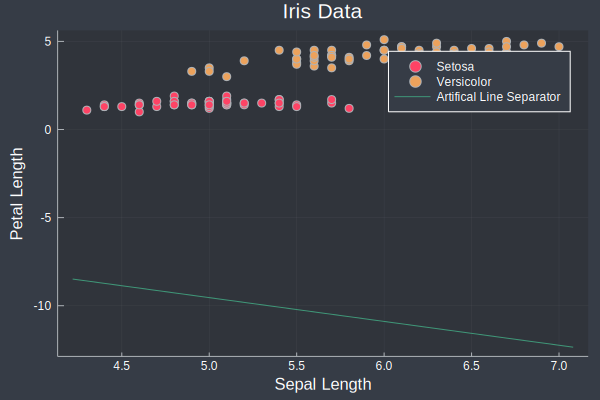

In [9]:
w = rand(3)
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "Artifical Line Separator")

### Training the Perceptron

In [10]:
for _ in 1:1000
    for i in 1:100
        w = classic_perceptron(X[i], Y[i], w)
    end
end
println("Our updated weights are as follows ", w)

Our updated weights are as follows [3.8101341565542413, 5.192624128644215, -11.409362053384163]


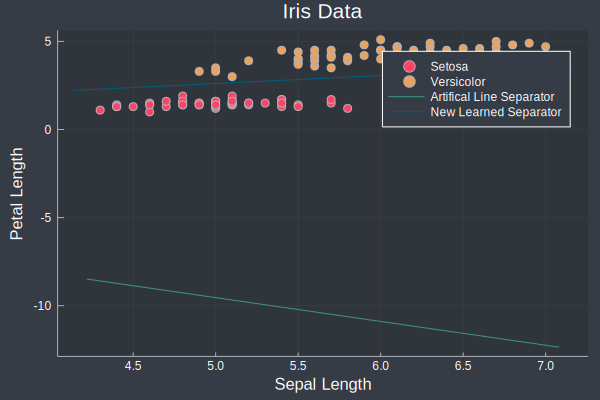

In [11]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label= "New Learned Separator")


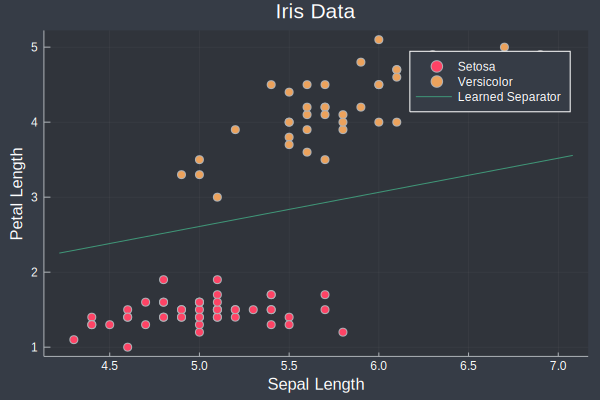

In [12]:
scatter([x[1:2] for x in data if x[3] == "setosa"], label = "Setosa")
scatter!([x[1:2] for x in data if x[3] == "versicolor"], label = "Versicolor")
plot!(title = "Iris Data", xlabel = "Sepal Length", ylabel = "Petal Length")
plot!(x -> (-w[1]-w[2]*x)/w[3], label= "Learned Separator")